In [ ]:
# Frequentist Neural Network for Classification

# Required Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# --- Generate synthetic bimodal data ---
def generate_bimodal_data(n_points=500, noise_std=0.1, seed=42):
    np.random.seed(seed)
    X = np.random.uniform(-4, 4, size=(n_points, 1))
    y = []
    for x in X:
        if np.random.rand() < 0.5:
            y_val = np.sin(x) + np.random.normal(0, noise_std)
        else:
            y_val = -np.sin(x) + np.random.normal(0, noise_std)
        y.append(y_val)
    y = np.array(y).reshape(-1, 1)
    return X.astype("float32"), y.astype("float32")

In [ ]:
X, y = generate_bimodal_data()

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
# --- Frequentist Regression Neural Network ---
class FrequentistNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FrequentistNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [ ]:
# Initialize Model
input_dim = X_train.shape[1]
hidden_dim = 50
output_dim = 1  # regression

model = FrequentistNN(input_dim, hidden_dim, output_dim)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.4852
Epoch [20/100], Loss: 0.4461
Epoch [30/100], Loss: 0.4474
Epoch [40/100], Loss: 0.4372
Epoch [50/100], Loss: 0.4338
Epoch [60/100], Loss: 0.4310
Epoch [70/100], Loss: 0.4289
Epoch [80/100], Loss: 0.4276
Epoch [90/100], Loss: 0.4266
Epoch [100/100], Loss: 0.4259


📈 Frequentist NN RMSE: 0.7129


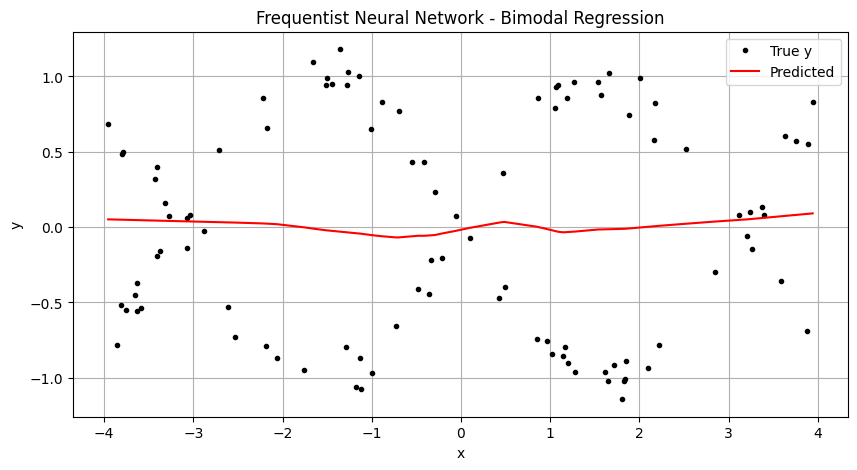

In [ ]:
# --- Testing ---
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()
    y_true = y_test_tensor.numpy()

rmse = np.sqrt(np.mean((y_true - predictions) ** 2))
print(f"📈 Frequentist NN RMSE: {rmse:.4f}")

# --- Plot ---
x_plot = X_test.flatten()
sorted_idx = np.argsort(x_plot)

plt.figure(figsize=(10, 5))
plt.plot(x_plot[sorted_idx], y_true[sorted_idx], 'k.', label='True y')
plt.plot(x_plot[sorted_idx], predictions[sorted_idx], 'r-', label='Predicted')
plt.title("Frequentist Neural Network - Bimodal Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()